In [235]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import xarray as xr
import seaborn as sns
#import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import colormaps as cmaps


%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


In [236]:
snow_depth =  xr.open_dataset('../data/SnowDepth_snd/snd_grid50N_CCSM4_rcp45_1.nc', decode_times=False)

In [237]:
month_idx = pd.date_range('2005-01-01', periods=95*12, freq='1M')

In [238]:
snow_means = snow_depth.mean(dim=["x", "y", "nb2", "nv4"])["snd"].to_dataframe()

In [239]:
snow_means = snow_means.set_index(month_idx)
snow_means.head()

,snd
2005-01-31,0.190969
2005-02-28,0.216298
2005-03-31,0.240877
2005-04-30,0.258466
2005-05-31,0.264354


In [240]:
month_idx

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31',
               ...
               '2099-03-31', '2099-04-30', '2099-05-31', '2099-06-30',
               '2099-07-31', '2099-08-31', '2099-09-30', '2099-10-31',
               '2099-11-30', '2099-12-31'],
              dtype='datetime64[ns]', length=1140, freq='M')

In [241]:
snow_means.describe()

,snd
count,1140.000000
mean,0.108919
std,0.072638
min,0.000391
25%,0.039139
50%,0.108609
75%,0.171764
max,0.283140


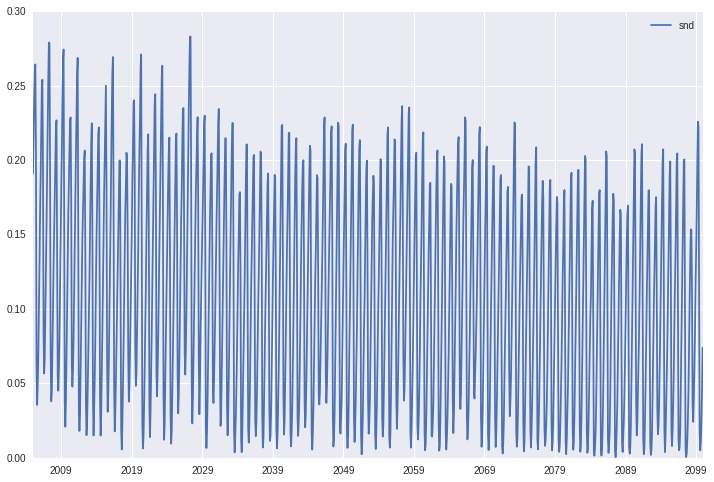

In [242]:
snow_means.plot()

In [243]:
snow_means["2005"]

,snd
2005-01-31,0.190969
2005-02-28,0.216298
2005-03-31,0.240877
2005-04-30,0.258466
2005-05-31,0.264354
2005-06-30,0.204927
2005-07-31,0.062769
2005-08-31,0.035574
2005-09-30,0.047961
2005-10-31,0.067846


In [244]:
snow_means["2005-01"]

,snd
2005-01-31,0.190969


In [245]:
snow_means["2005-01":"2006"]

,snd
2005-01-31,0.190969
2005-02-28,0.216298
2005-03-31,0.240877
2005-04-30,0.258466
2005-05-31,0.264354
2005-06-30,0.204927
2005-07-31,0.062769
2005-08-31,0.035574
2005-09-30,0.047961
2005-10-31,0.067846


In [246]:
snow_means[ snow_means["snd"] > 0.26]

,snd
2005-05-31,0.264354
2007-04-30,0.279129
2007-05-31,0.278736
2009-04-30,0.265548
2009-05-31,0.274397
2011-05-31,0.268747
2016-05-31,0.269354
2020-04-30,0.262302
2020-05-31,0.271037
2023-05-31,0.263450


In [247]:
[snow_means.mean(),
 snow_means.var(),
 snow_means.max()]

[snd    0.108919
 dtype: float64, snd    0.005276
 dtype: float64, snd    0.28314
 dtype: float64]

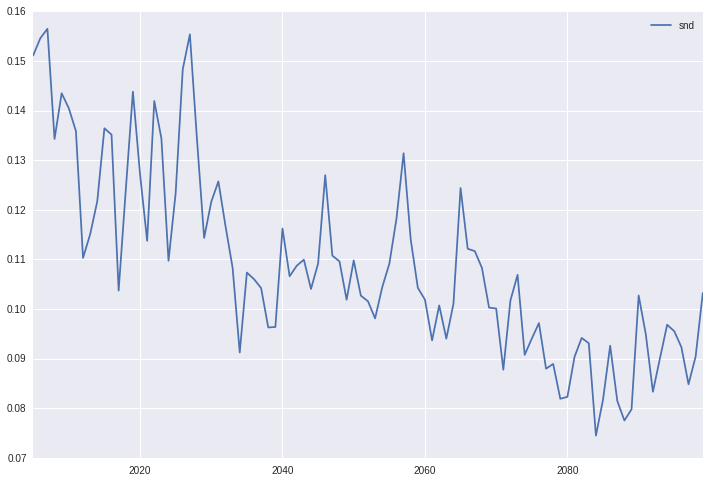

In [248]:
snow_means.groupby(snow_means.index.year).mean().plot()

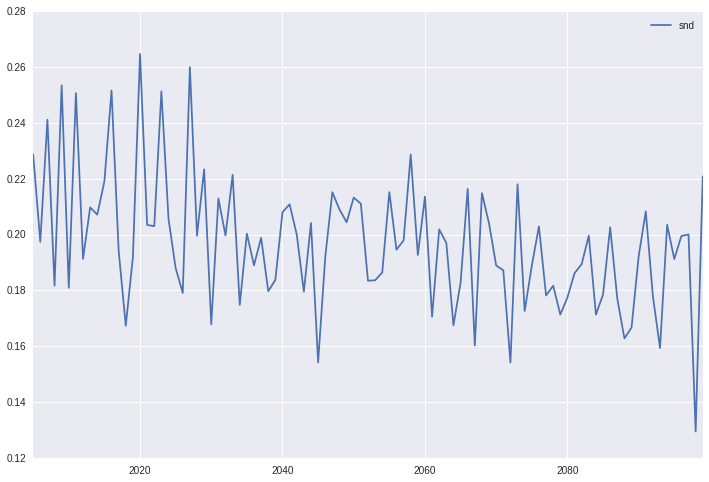

In [249]:
snow_means.groupby(snow_means.index.year).apply(lambda x: np.max(x)-np.min(x)).plot() # plot range each year

## Trend and seasonality

In [250]:
res = sm.tsa.seasonal_decompose(snow_means)

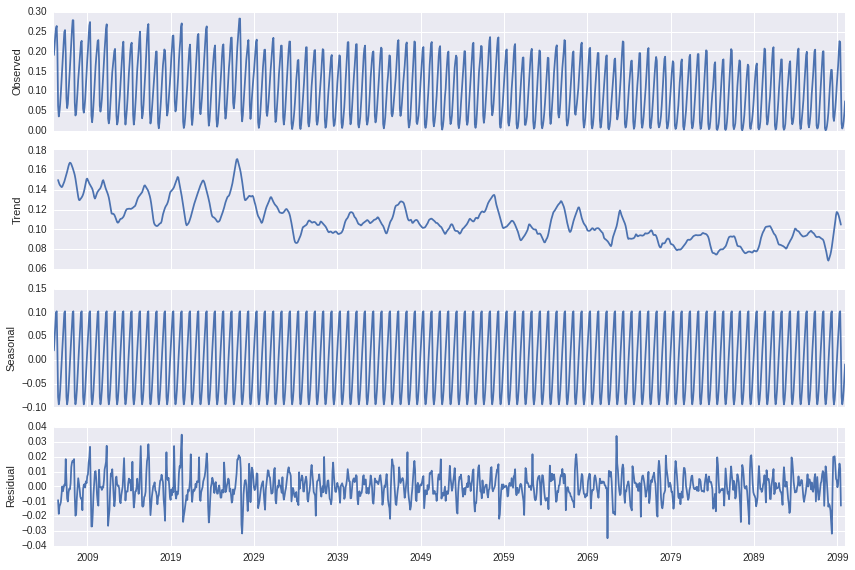

In [251]:
resplot = res.plot()

In [252]:
res.trend.describe()

,snd
count,1128.000000
mean,0.108723
std,0.019626
min,0.068430
25%,NaN
50%,NaN
75%,NaN
max,0.171175


## Rolling statistics

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


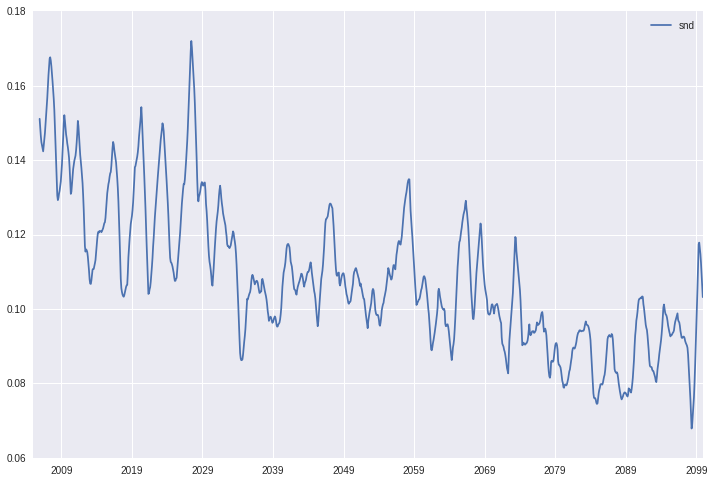

In [253]:
pd.rolling_mean(snow_means, window=12).plot()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=36,center=False).mean()
  if __name__ == '__main__':


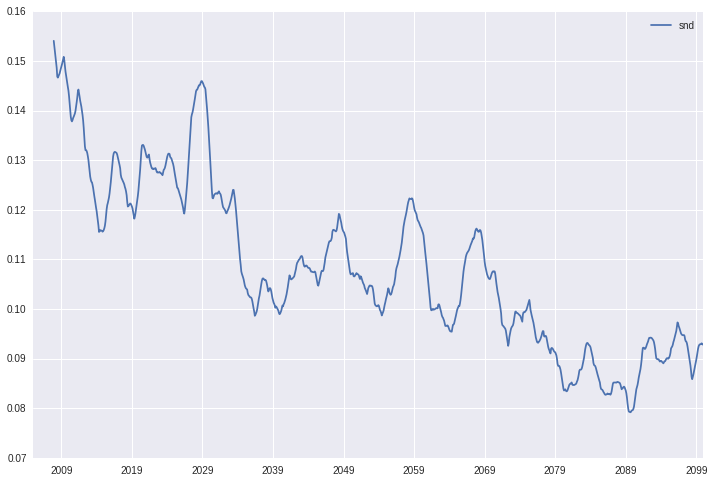

In [254]:
pd.rolling_mean(snow_means, window=36).plot()

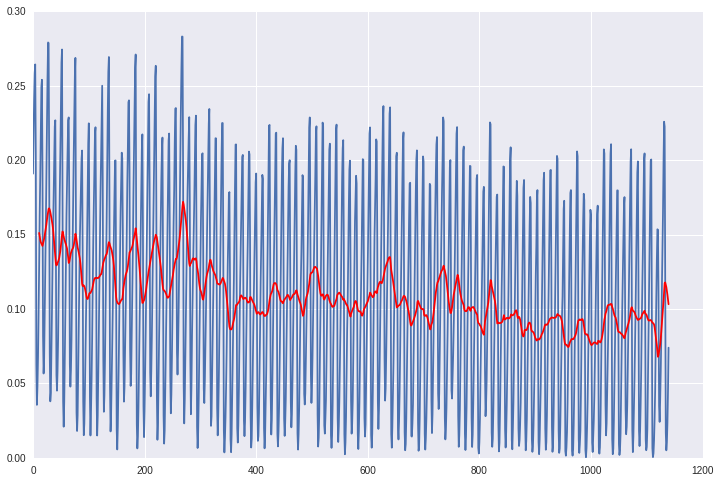

In [255]:
## plot both to more easily compare
moving_avg = snow_means.rolling(window=12,center=False).mean()
plt.plot(snow_means)
plt.plot(moving_avg, color="red")